1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

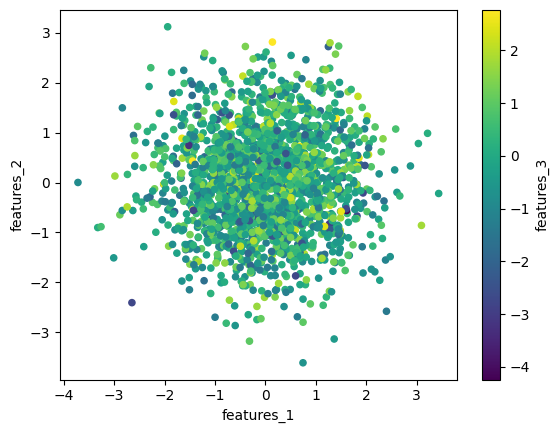

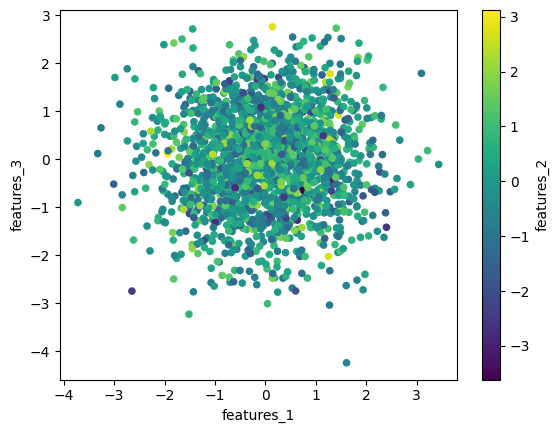

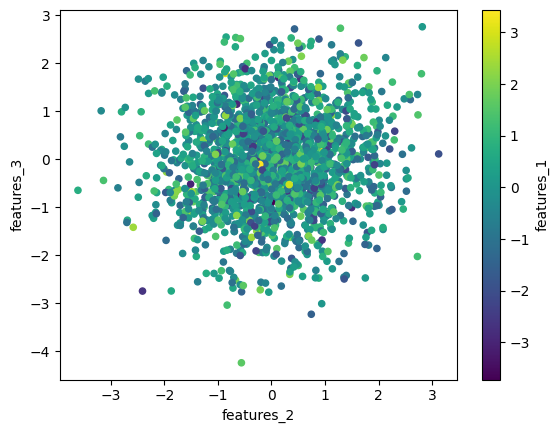

In [1]:
# Part 1.
import pandas as pd
# Read the file with pandas
df = pd.read_csv(r'regression_generated.csv')

# Draw scatter plots with all possible combinations of the features 1, 2 and 3.
ax1 = df.plot.scatter(x='features_1', y='features_2', c='features_3')

ax2 = df.plot.scatter(x='features_1', y='features_3', c='features_2')

ax3 = df.plot.scatter(x='features_2', y='features_3', c='features_1')

# Features 1, 2 and 3 are not seem to be correlated

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

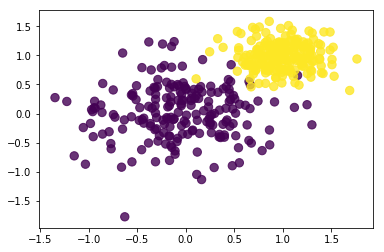

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

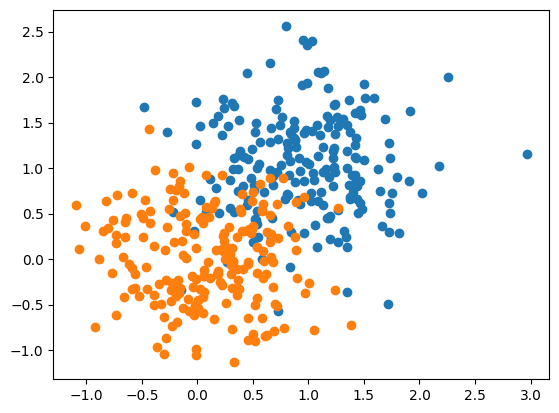

In [3]:
# Part 2.
import numpy as np
import matplotlib.pyplot as plt

def gaussian(mean, std): 
    return np.random.normal(mean, std, 200)

# Get and scatter x1 and y1
x1 = gaussian(1,0.5)
y1 = gaussian(1,0.5)
plt.scatter(x1, y1)

# Get and scatter x2 and y2
x2 = gaussian(0,0.5)
y2 = gaussian(0,0.5)
plt.scatter(x2, y2)

# Show the plot
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


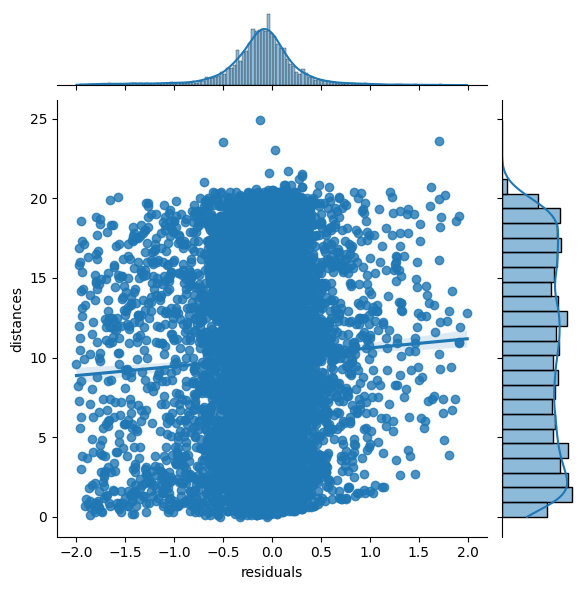

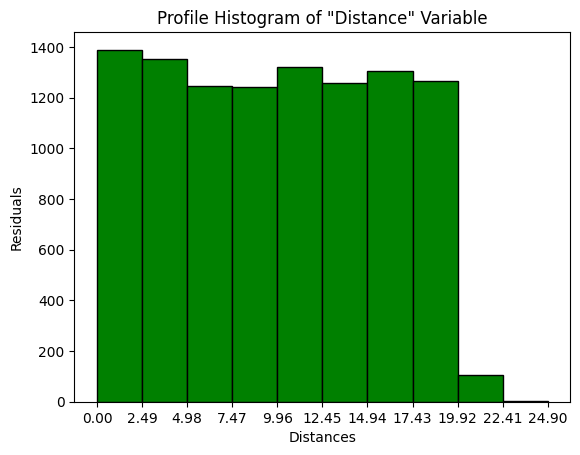

x:
 [ 0.    2.49  4.98  7.47  9.96 12.45 14.94 17.43 19.92 22.41 24.9 ]
y:
 12.449999999999989
err_y:
 7.874071373819257


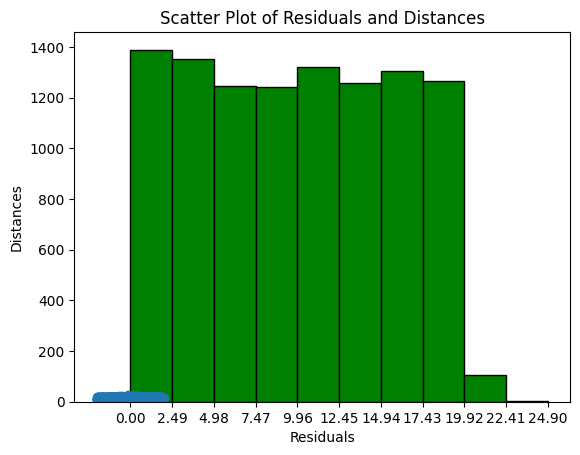

In [4]:
# Part 3.
import seaborn as sns
data = pd.read_pickle('residuals_261.pkl')
# Inspecting the data
print(data)
# Converting the data into Pandas DataFrame
df = pd.DataFrame(data[()])
# print(df)
# Cleaning the sample by selecting the entries with the absolute values of the variable smaller than 2
df = df[np.abs(df['residuals']) < 2]
# print(df)
# Plot a Seaborn jointplot of "residuals" versus "distances"
sns.jointplot(x = "residuals", y = "distances", kind='reg', data=df)

# From the jointplot, we can state that there is a positive correlation between the variables,
# as the "residuals" values increase, "distances" also increase.

# Creating the profile histogram for the "distance" variable.
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df['distances'], facecolor='green', edgecolor='black')
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
plt.ylabel('Residuals')
plt.xlabel('Distances')
plt.title('Profile Histogram of "Distance" Variable')
plt.show()

# Obtain x, y and err_y
x = bins
y = np.array(np.mean(bins))
err_y = np.array(np.std(bins))
print('x:\n', x)
print('y:\n', y)
print('err_y:\n', err_y)

# Plot the profile plot on top of scatter plot
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df['distances'], facecolor='green', edgecolor='black')
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
plt.ylabel('Residuals')
plt.xlabel('Distances')
plt.title('Profile Histogram of "Distance" Variable')

plt.scatter(df['residuals'], df['distances'])
plt.xlabel('Residuals')
plt.ylabel('Distances')
plt.title('Scatter Plot of Residuals and Distances')
plt.show()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


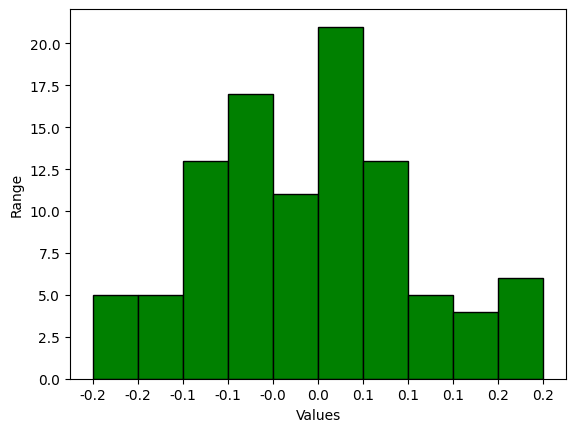

In [5]:
# Part 4.
from matplotlib.ticker import FormatStrFormatter
# Filling a numpy array x of length N with a variable normally distributed, with a given mean and standard deviation
mean = 0
std = 0.1
N = 100
x = np.random.normal(mean, std, N)
# print(x)
# Fill an histogram in pyplot
# plt.hist(x)
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(x, facecolor='green', edgecolor='black')
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the x axis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.ylabel('Range')
plt.xlabel('Values')
plt.show()

# Display the histograms as data points with errors.
# For every elements of x, create a gaussian with the mean corresponding to the element value and the standard deviation.